#### Saturday, January 20, 2024

https://github.com/PacktPublishing/Vector-Search-for-Practitioners-with-Elastic/blob/main/chapter2/dense-vs-sparse.ipynb

In [1]:
import numpy as np 
from scipy.sparse import random 
from sklearn.decomposition import TruncatedSVD 
import matplotlib.pyplot as plt 

In [2]:
# Generate a corpus of 100 documents, each containing 1000 words 
vocab_size = 10000 
num_docs = 100 
doc_len = 1000 

In [3]:
# Create a vocabulary of 10000 words 
vocab = [f'word{i}' for i in range(vocab_size)] 

In [4]:
# Generate a random dense vector representing each document 
dense_vectors = np.zeros((num_docs, vocab_size)) 
for i in range(num_docs): 
    word_indices = np.random.choice(vocab_size, doc_len) 
    for j in word_indices: 
        dense_vectors[i, j] += 1 


In [5]:
# Convert Create the dense vectors to sparse format 
sparse_vectors = random(num_docs, vocab_size, density=0.01, format='csr') 

In [6]:
for i in range(num_docs): 
    word_indices = np.random.choice(vocab_size, doc_len) 
    for j in word_indices: 
        sparse_vectors[i, j] += 1 

# 1m 53.1s

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [7]:
# Use TruncatedSVD to reduce the dimensionality of the dense vectors 
svd = TruncatedSVD(n_components=2) 
dense_vectors_svd = svd.fit_transform(dense_vectors) 

In [8]:
# Apply TruncatedSVD to the sparse vectors
sparse_vectors_svd = svd.transform(sparse_vectors)

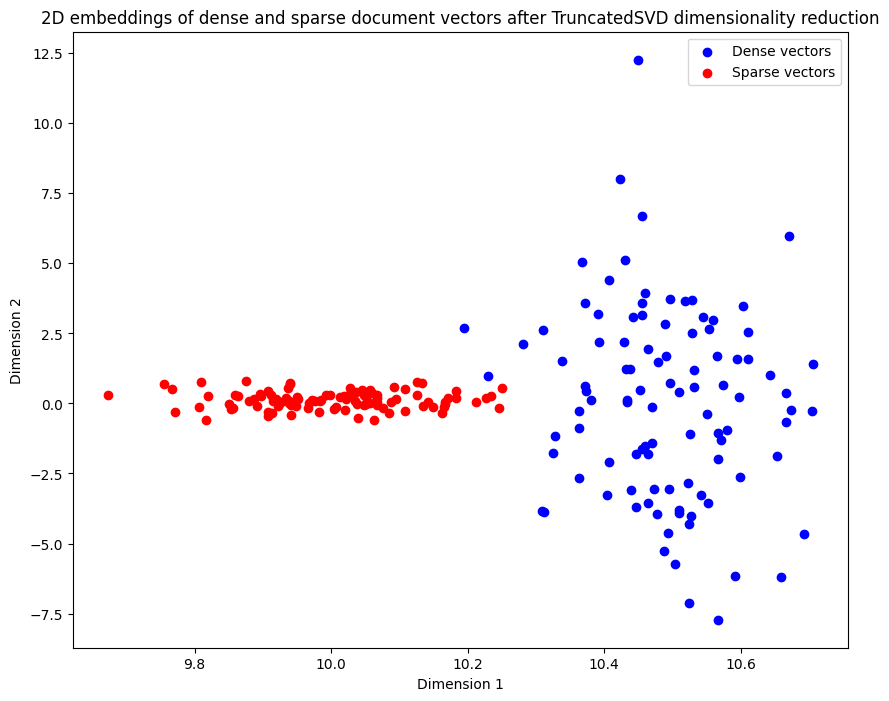

In [9]:
# Plot the dense and sparse vectors on a scatter plot 
fig, ax = plt.subplots(figsize=(10, 8)) 
ax.scatter(dense_vectors_svd[:, 0], dense_vectors_svd[:, 1], c='b', label='Dense vectors') 
ax.scatter(sparse_vectors_svd[:, 0], sparse_vectors_svd[:, 1], c='r', label='Sparse vectors') 
ax.set_title('2D embeddings of dense and sparse document vectors after TruncatedSVD dimensionality reduction') 
ax.set_xlabel('Dimension 1') 
ax.set_ylabel('Dimension 2') 
ax.legend() 
plt.show()
